In [15]:
#GIS Plotting Project Draft

#---Script Objective & Work Plan---
#---My main objective for my portion of the plotting project is to create statistical plots & figures
#---based on user input. User will provide the geodatabase and shapefile that they're using, in addition to 
#---what specific data they would like to plot from the shapefile. For the desired figure, the user will also input parameters for visualization
#---such as figure size, margins, labels, data points from the gdb/shapefile, etc.

#---Future Work Plan: At the moment, this code is a work in progress. Currently I am testing it with simple visualizations
#---such as a bar graph using shapefiles in the USA gdb. However, I would like to expand this to other figures such as
#---scatterplots, and statistical distribution figures like histograms and boxplots.

#----Currently a work in progress. Code below is what I've written so far----

In [16]:
import matplotlib.pyplot as plt
import geopandas as gpd
import fiona
import os
import numpy as np

In [17]:
#Importing gdb
gdb_path = input(r"Insert geodatabase path: ")

Insert geodatabase path: C:\Users\UofM\Downloads\USA


In [18]:
layers = fiona.listlayers(gdb_path)
for shp in layers:
    print(shp) 

adi
CITIES
COUNTIES
DRAINAGE
LAKES
places
Rivers
ROADS
ROADS_RT
STATES
zip_usa


In [19]:
#listing all files in gdb
all_files = os.listdir(gdb_path)
print(all_files)

['adi.avl', 'adi.dbf', 'adi.prj', 'adi.sbn', 'adi.sbx', 'adi.shp', 'adi.shx', 'cities.avl', 'Cities.dbf', 'cities.prj', 'CITIES.SBN', 'CITIES.SBX', 'CITIES.SHP', 'CITIES.SHX', 'counties.avl', 'Counties.dbf', 'counties.prj', 'COUNTIES.SBN', 'COUNTIES.SBX', 'COUNTIES.SHP', 'COUNTIES.shp.xml', 'COUNTIES.SHX', 'drainage.avl', 'DRAINAGE.DBF', 'drainage.prj', 'DRAINAGE.SBN', 'DRAINAGE.SBX', 'DRAINAGE.SHP', 'DRAINAGE.SHX', 'lakes.avl', 'LAKES.DBF', 'lakes.prj', 'LAKES.SBN', 'LAKES.SBX', 'LAKES.SHP', 'LAKES.SHX', 'places.avl', 'places.dbf', 'places.ixs', 'places.mxs', 'places.prj', 'places.sbn', 'places.sbx', 'places.shp', 'places.shx', 'rivers.avl', 'Rivers.dbf', 'rivers.prj', 'Rivers.sbn', 'Rivers.sbx', 'Rivers.shp', 'Rivers.shx', 'roads.avl', 'ROADS.DBF', 'roads.prj', 'ROADS.SBN', 'ROADS.SBX', 'ROADS.SHP', 'ROADS.SHX', 'roads_rt.avl', 'ROADS_RT.DBF', 'roads_rt.prj', 'ROADS_RT.SBN', 'ROADS_RT.SBX', 'ROADS_RT.SHP', 'ROADS_RT.SHX', 'states.avl', 'States.dbf', 'states.prj', 'STATES.SBN', 'STATE

In [20]:
shapefiles = []
for file in all_files:
    if file.endswith(('.shp','.SHP')):
        shapefiles.append(file)
print(shapefiles)

['adi.shp', 'CITIES.SHP', 'COUNTIES.SHP', 'DRAINAGE.SHP', 'LAKES.SHP', 'places.shp', 'Rivers.shp', 'ROADS.SHP', 'ROADS_RT.SHP', 'STATES.SHP', 'zip_usa.shp']


In [21]:
#List the available shapefiles in gdb and ask user which shp they'd like to use
print("Available shapefiles:")
for shp in shapefiles:
    print(shp)
input_shp = input("Insert shapefile you'd like to use: ")
shp_path = os.path.join(gdb_path, input_shp)
print(shp_path)

Available shapefiles:
adi.shp
CITIES.SHP
COUNTIES.SHP
DRAINAGE.SHP
LAKES.SHP
places.shp
Rivers.shp
ROADS.SHP
ROADS_RT.SHP
STATES.SHP
zip_usa.shp
Insert shapefile you'd like to use: LAKES.SHP
C:\Users\UofM\Downloads\USA\LAKES.SHP


In [22]:
#Read shapefile given and list its columns
shp = gpd.read_file(shp_path)
col_list = []
for col in shp:
    col_list.append(col)
print(col_list)

['AREA', 'NAME', 'geometry']


What plot would you like to use? Scatter Plot
List of columns in your shapefile: 
['AREA', 'NAME', 'geometry']
Enter the 1st column you'd like to use: NAME
Enter the 2nd column you'd like to use: AREA
Columns to be used:  NAME and AREA
Are you using a specific range of values from your list? (Type 'Yes or 'No'): No
Width of your plot: 13
Height of your plot: 6
Add a title: Lake Area
Name your x-axis: Lake
Name your y-axis: Area (in m^2)


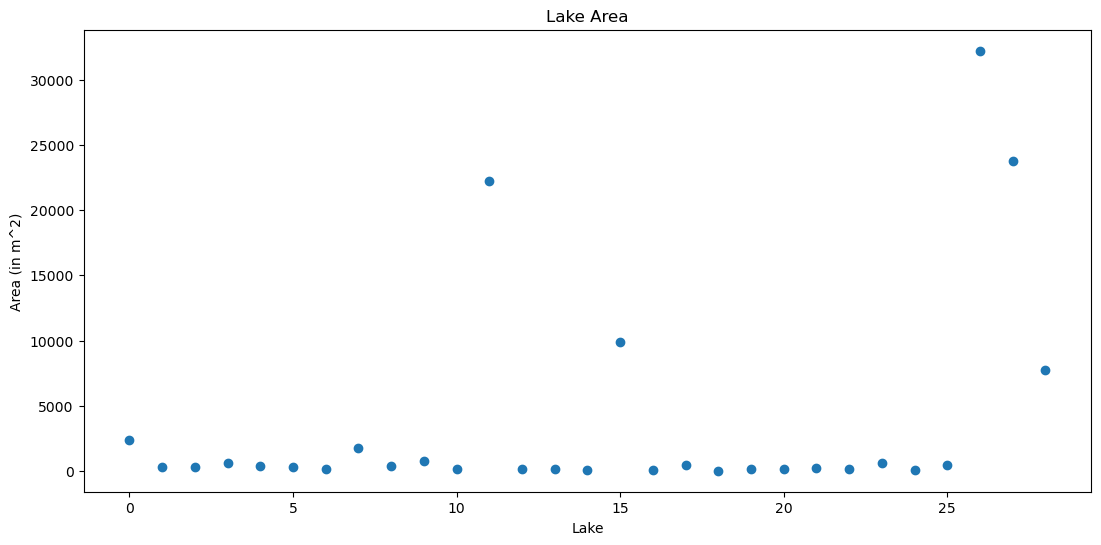

In [23]:
#Ask User what plot they want
input_figure = input("What plot would you like to use? ")

#Bar Graph

if input_figure == 'Bar Graph':
    #Input data to be used
    print("List of columns in your shapefile: ")
    print(col_list)
    input_col1 = input("Enter the 1st column you'd like to use: ")
    input_col2 = input("Enter the 2nd column you'd like to use: ")
    input_col1_list = []
    input_col2_list = []
    print("Columns to be used: " , input_col1, "and" , input_col2)
    for i, row in shp.iterrows():
        input_col1_list.append(row[input_col1])
        input_col2_list.append(row[input_col2])
        
    #User Input Parameters for Bar Graph
    input_range = input("Are you using a specific range of values from your list? (Type 'Yes or 'No'): ")
    if input_range == 'Yes':
        start_range = int(input("Enter your start value: "))
        end_range = int(input("Enter your end value: "))
        
        xAxis = input_col1_list[start_range: end_range + 1]
        yAxis = input_col2_list[start_range: end_range + 1]
        
        graph_width = int(input("Width of your graph: "))
        graph_height = int(input("Height of your graph: "))
        graph_title = input("Add a title: ")
        labelX = input("Name your x-axis: ")
        labelY = input("Name your y-axis: ")
        
        #Plot bar graph
        fig, ax = plt.subplots(figsize=(graph_width, graph_height))
        plt.ticklabel_format(style='plain')
        plt.bar(xAxis, yAxis)
        plt.xlabel(labelX)
        plt.ylabel(labelY)
        plt.title(graph_title)
        plt.show()     
        
    elif input_range == 'No':
        xAxis = input_col1_list
        yAxis = input_col2_list
        
        graph_width = int(input("Width of your graph: "))
        graph_height = int(input("Height of your graph: "))
        
        graph_title = input("Add a title: ")
        labelX = input("Name your x-axis: ")
        labelY = input("Name your y-axis: ")
    
        #Plot bar graph
        fig, ax = plt.subplots(figsize=(graph_width, graph_height))
        plt.ticklabel_format(style='plain')
        plt.bar(xAxis, yAxis)
        plt.xlabel(labelX)
        plt.ylabel(labelY)
        plt.title(graph_title)
        plt.show()
        
#--------------------------------------------------------------------
        
#Scatter Plot

if input_figure == 'Scatter Plot':
    print("List of columns in your shapefile: ")
    print(col_list)
    input_col1 = input("Enter the 1st column you'd like to use: ")
    input_col2 = input("Enter the 2nd column you'd like to use: ")
    input_col1_list = []
    input_col2_list = []
    print("Columns to be used: " , input_col1, "and" , input_col2)
    for i, row in shp.iterrows():
        input_col1_list.append(row[input_col1])
        input_col2_list.append(row[input_col2])
    input_range = input("Are you using a specific range of values from your list? (Type 'Yes or 'No'): ")
    if input_range == 'Yes':
        start_range = int(input("Enter your start value: "))
        end_range = int(input("Enter your end value: "))
        
        xAxis = input_col1_list[start_range: end_range + 1]
        yAxis = input_col2_list[start_range: end_range + 1]
        
        graph_width = int(input("Width of your graph: "))
        graph_height = int(input("Height of your graph: "))
        graph_title = input("Enter a title: ")
        labelX = input("Name your x-axis: ")
        labelY = input("Name your y-axis: ")
        
        # Make scatter plot   
        xAxis = range(len(input_col1_list[start_range:end_range]))
        yAxis = input_col2_list[start_range:end_range]


        plt.scatter(x, y)
        plt.ticklabel_format(style='plain')
        plt.xlabel(labelX)
        plt.ylabel(labelY)
        plt.title(graph_title)
        plt.show()
        
    elif input_range == 'No':
        
        graph_width = int(input("Width of your plot: "))
        graph_height = int(input("Height of your plot: "))
        graph_title = input("Add a title: ")
        labelX = input("Name your x-axis: ")
        labelY = input("Name your y-axis: ")
        
        # Make scatter plot
        fig, ax = plt.subplots(figsize=(graph_width, graph_height))
        x = range(len(input_col1_list))
        y = input_col2_list
        plt.scatter(x, y)
        plt.ticklabel_format(style='plain')
        plt.title(graph_title)
        plt.xlabel(labelX)
        plt.ylabel(labelY)
        
#---------------------------------------

#Histogram

if input_figure == 'Histogram':
    print("List of columns in your shapefile: ")
    print(col_list)
    input_column = input("Enter the column you'd like to use: ")
    input_column_list = []
    print("Column to be used: " , input_column)
    for i, row in shp.iterrows():
        input_column_list.append(row[input_column])
        
    input_bins = int(input("Enter the number of bins for your histogram: "))
    graph_width = int(input("Width of your plot: "))
    graph_height = int(input("Height of your plot: "))
    graph_title = input("Enter a title: ")
    labelX = input("Name your x-axis: ")
    
    # Create the histogram
    fig, ax = plt.subplots(figsize=(graph_width, graph_height))
    plt.hist(input_column_list, bins= input_bins, edgecolor = 'black')
    plt.xlabel(labelX)
    plt.ylabel('Frequency')
    plt.title(graph_title)
    plt.show()

        